# üìä Ph√¢n T√≠ch K·∫øt Qu·∫£ Ph√¢n C·ª•m K-means - Ph√°t Hi·ªán R·ª≠a Ti·ªÅn

**D·ª± √°n:** Ph√¢n t√≠ch giao d·ªãch HI-Large  
**D·ªØ li·ªáu:** 179 tri·ªáu giao d·ªãch  
**Ph∆∞∆°ng ph√°p:** Ph√¢n c·ª•m K-means v·ªõi Apache Spark + Polars  

---

## 1. ‚öôÔ∏è Setup & Import Th∆∞ Vi·ªán

In [1]:
import polars as pl
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import gc

# C·∫•u h√¨nh
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("‚úÖ ƒê√£ import th∆∞ vi·ªán th√†nh c√¥ng!")

‚úÖ ƒê√£ import th∆∞ vi·ªán th√†nh c√¥ng!


## 2. üìÇ ƒê·ªçc D·ªØ Li·ªáu Cluster (Memory-Safe)

In [2]:
# ƒê∆∞·ªùng d·∫´n
ROOT = Path.cwd().parent if 'visualizations' in str(Path.cwd()) else Path.cwd()
DATA_RAW = ROOT / '01_data' / 'raw' / 'HI-Large_Trans.csv'
DATA_RESULTS = ROOT / '01_data' / 'results'

print(f"üìÇ Th∆∞ m·ª•c g·ªëc: {ROOT}")
print(f"üìÇ Th∆∞ m·ª•c k·∫øt qu·∫£: {DATA_RESULTS}")

üìÇ Th∆∞ m·ª•c g·ªëc: /home/ultimatebrok/Downloads/Final
üìÇ Th∆∞ m·ª•c k·∫øt qu·∫£: /home/ultimatebrok/Downloads/Final/01_data/results


In [3]:
# ƒê·ªçc k·∫øt qu·∫£ ph√¢n c·ª•m
clusters_file = DATA_RESULTS / 'clustered_results.txt'
print(f"ƒêang ƒë·ªçc k·∫øt qu·∫£ ph√¢n c·ª•m t·ª´: {clusters_file}")

clusters = np.loadtxt(clusters_file, dtype=int)

print(f"‚úÖ ƒê√£ t·∫£i {len(clusters):,} nh√£n c·ª•m")
print(f"S·ªë c·ª•m: {np.unique(clusters).size}")

ƒêang ƒë·ªçc k·∫øt qu·∫£ ph√¢n c·ª•m t·ª´: /home/ultimatebrok/Downloads/Final/01_data/results/clustered_results.txt
‚úÖ ƒê√£ t·∫£i 179,702,229 nh√£n c·ª•m
S·ªë c·ª•m: 5


## 3. üìä Th·ªëng K√™ C∆° B·∫£n (Kh√¥ng C·∫ßn Load To√†n B·ªô CSV)

In [4]:
# T√≠nh to√°n t·ª´ clusters array (kh√¥ng c·∫ßn CSV)
total_transactions = len(clusters)
n_clusters = np.unique(clusters).size

# ƒê·∫øm ph√¢n ph·ªëi clusters
unique, counts = np.unique(clusters, return_counts=True)
cluster_distribution = dict(zip(unique, counts))

print("="*70)
print("TH·ªêNG K√ä T·ªîNG QUAN")
print("="*70)
print(f"T·ªïng s·ªë giao d·ªãch: {total_transactions:,}")
print(f"S·ªë c·ª•m: {n_clusters}")
print(f"\nPh√¢n ph·ªëi giao d·ªãch theo c·ª•m:")
for cluster_id, count in sorted(cluster_distribution.items()):
    percentage = (count / total_transactions) * 100
    print(f"  C·ª•m {cluster_id}: {count:>15,} ({percentage:>6.2f}%)")
print("="*70)

TH·ªêNG K√ä T·ªîNG QUAN
T·ªïng s·ªë giao d·ªãch: 179,702,229
S·ªë c·ª•m: 5

Ph√¢n ph·ªëi giao d·ªãch theo c·ª•m:
  C·ª•m 0:      69,716,345 ( 38.80%)
  C·ª•m 1:      69,068,010 ( 38.43%)
  C·ª•m 2:      37,012,845 ( 20.60%)
  C·ª•m 3:               8 (  0.00%)
  C·ª•m 4:       3,905,021 (  2.17%)


## 4. üìà Bi·ªÉu ƒê·ªì Ph√¢n Ph·ªëi C·ª•m

In [5]:
# T·∫°o DataFrame t·ª´ cluster distribution
cluster_df = pl.DataFrame({
    'cluster': list(cluster_distribution.keys()),
    'count': list(cluster_distribution.values())
}).with_columns(
    (pl.col('count') / total_transactions * 100).alias('percentage')
).sort('cluster')

print(cluster_df)

shape: (5, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ cluster ‚îÜ count    ‚îÜ percentage ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---        ‚îÇ
‚îÇ i64     ‚îÜ i64      ‚îÜ f64        ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 69716345 ‚îÜ 38.795481  ‚îÇ
‚îÇ 1       ‚îÜ 69068010 ‚îÜ 38.434699  ‚îÇ
‚îÇ 2       ‚îÜ 37012845 ‚îÜ 20.596765  ‚îÇ
‚îÇ 3       ‚îÜ 8        ‚îÜ 0.000004   ‚îÇ
‚îÇ 4       ‚îÜ 3905021  ‚îÜ 2.173051   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


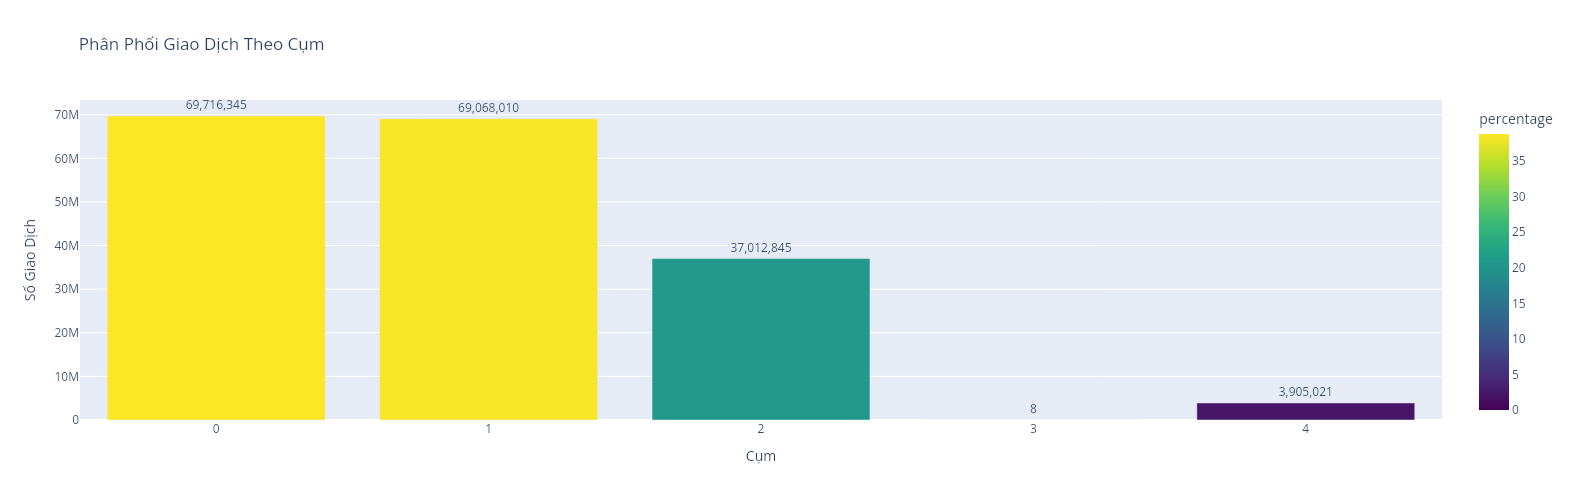

In [6]:
# Bi·ªÉu ƒë·ªì c·ªôt - Ph√¢n ph·ªëi c√°c c·ª•m
fig = px.bar(
    cluster_df.to_pandas(),
    x='cluster',
    y='count',
    title='Ph√¢n Ph·ªëi Giao D·ªãch Theo C·ª•m',
    labels={'cluster': 'C·ª•m', 'count': 'S·ªë Giao D·ªãch'},
    text='count',
    color='percentage',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
fig.update_layout(height=500, showlegend=False)
fig.show()

## 5. üí∞ Ph√¢n T√≠ch R·ª≠a Ti·ªÅn (D√πng Lazy Loading + Streaming)

In [7]:
print("‚è≥ ƒêang ph√¢n t√≠ch r·ª≠a ti·ªÅn v·ªõi Lazy Loading (ti·∫øt ki·ªám RAM)...")
print("L∆∞u √Ω: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t 2-3 ph√∫t ƒë·ªÉ x·ª≠ l√Ω 16GB CSV")
print()

# D√πng scan_csv (lazy) ƒë·ªÉ kh√¥ng load to√†n b·ªô v√†o RAM
df_lazy = pl.scan_csv(DATA_RAW)

# Th√™m c·ªôt cluster (v·∫´n lazy)
df_lazy = df_lazy.with_columns(
    pl.Series('cluster', clusters).alias('cluster')
)

# T√≠nh to√°n ch·ªâ khi c·∫ßn (collect ch·ªâ k·∫øt qu·∫£ t·ªïng h·ª£p - nh·ªè)
laundering_stats = df_lazy.group_by('cluster').agg([
    pl.len().alias('total'),
    pl.col('Is Laundering').sum().alias('laundering_count'),
    (pl.col('Is Laundering').sum() / pl.len() * 100).alias('laundering_rate')
]).sort('cluster').collect()  # Ch·ªâ collect k·∫øt qu·∫£ nh·ªè (5 rows)

print("‚úÖ Ho√†n t·∫•t ph√¢n t√≠ch!")
print()
print(laundering_stats)

‚è≥ ƒêang ph√¢n t√≠ch r·ª≠a ti·ªÅn v·ªõi Lazy Loading (ti·∫øt ki·ªám RAM)...
L∆∞u √Ω: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t 2-3 ph√∫t ƒë·ªÉ x·ª≠ l√Ω 16GB CSV

‚úÖ Ho√†n t·∫•t ph√¢n t√≠ch!

shape: (5, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ cluster ‚îÜ total    ‚îÜ laundering_count ‚îÜ laundering_rate ‚îÇ
‚îÇ ---     ‚îÜ ---      ‚îÜ ---              ‚îÜ ---             ‚îÇ
‚îÇ i64     ‚îÜ u32      ‚îÜ i64              ‚îÜ f64             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 69716345 ‚îÜ 90355            ‚îÜ 0.129604        ‚îÇ
‚îÇ 1       ‚îÜ 69068010 ‚îÜ 102886           ‚îÜ 0.148963        ‚îÇ
‚îÇ 2       ‚îÜ 37012845 ‚îÜ 30696            ‚îÜ 0.082933        ‚îÇ
‚îÇ 3       ‚îÜ 8        ‚

In [8]:
# Bi·ªÉu ƒë·ªì t·ª∑ l·ªá r·ª≠a ti·ªÅn theo c·ª•m
fig = go.Figure()

fig.add_trace(go.Bar(
    x=laundering_stats['cluster'].to_list(),
    y=laundering_stats['laundering_rate'].to_list(),
    text=laundering_stats['laundering_rate'].to_list(),
    texttemplate='%{text:.3f}%',
    textposition='outside',
    marker=dict(
        color=laundering_stats['laundering_rate'].to_list(),
        colorscale='RdYlGn_r',
        showscale=True,
        colorbar=dict(title="T·ª∑ l·ªá (%)")
    )
))

# Th√™m ng∆∞·ª°ng c·∫£nh b√°o 10%
fig.add_hline(y=10.0, line_dash="dash", line_color="red", 
              annotation_text="Ng∆∞·ª°ng R·ªßi Ro Cao (10%)")

fig.update_layout(
    title='T·ª∑ L·ªá R·ª≠a Ti·ªÅn Theo C·ª•m',
    xaxis_title='C·ª•m',
    yaxis_title='T·ª∑ L·ªá R·ª≠a Ti·ªÅn (%)',
    height=500
)

fig.show()

In [9]:
# X√°c ƒë·ªãnh c·ª•m r·ªßi ro cao
high_risk = laundering_stats.filter(pl.col('laundering_rate') > 10.0)

if len(high_risk) > 0:
    print("‚ö†Ô∏è C·ª§M R·ª¶I RO CAO (>10% r·ª≠a ti·ªÅn):")
    print(high_risk)
else:
    print("‚úÖ Kh√¥ng c√≥ c·ª•m n√†o v∆∞·ª£t ng∆∞·ª°ng 10%")
    print("   T·∫•t c·∫£ c√°c c·ª•m ƒë·ªÅu trong m·ª©c ch·∫•p nh·∫≠n ƒë∆∞·ª£c.")

‚ö†Ô∏è C·ª§M R·ª¶I RO CAO (>10% r·ª≠a ti·ªÅn):
shape: (1, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ cluster ‚îÜ total ‚îÜ laundering_count ‚îÜ laundering_rate ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÜ ---              ‚îÜ ---             ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÜ i64              ‚îÜ f64             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 3       ‚îÜ 8     ‚îÜ 1                ‚îÜ 12.5            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


## 6. üíµ Ph√¢n T√≠ch S·ªë Ti·ªÅn Trung B√¨nh (Memory-Safe)

In [10]:
print("‚è≥ ƒêang t√≠nh s·ªë ti·ªÅn trung b√¨nh theo c·ª•m...")

# D√πng lazy loading, ch·ªâ collect k·∫øt qu·∫£ t·ªïng h·ª£p
df_lazy = pl.scan_csv(DATA_RAW)
df_lazy = df_lazy.with_columns(
    pl.Series('cluster', clusters).alias('cluster')
)

amount_stats = df_lazy.group_by('cluster').agg([
    pl.col('Amount Received').mean().alias('avg_received'),
    pl.col('Amount Paid').mean().alias('avg_paid'),
    (pl.col('Amount Received') / pl.col('Amount Paid')).mean().alias('avg_ratio')
]).sort('cluster').collect()

print("‚úÖ Ho√†n t·∫•t!")
print()
print(amount_stats)

‚è≥ ƒêang t√≠nh s·ªë ti·ªÅn trung b√¨nh theo c·ª•m...
‚úÖ Ho√†n t·∫•t!

shape: (5, 4)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ cluster ‚îÜ avg_received ‚îÜ avg_paid   ‚îÜ avg_ratio ‚îÇ
‚îÇ ---     ‚îÜ ---          ‚îÜ ---        ‚îÜ ---       ‚îÇ
‚îÇ i64     ‚îÜ f64          ‚îÜ f64        ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 0       ‚îÜ 8.7998e6     ‚îÜ 4.7488e6   ‚îÜ 3.381484  ‚îÇ
‚îÇ 1       ‚îÜ 3.3233e6     ‚îÜ 3.3233e6   ‚îÜ 1.0       ‚îÇ
‚îÇ 2       ‚îÜ 3.1663e6     ‚îÜ 3.1618e6   ‚îÜ 1.077734  ‚îÇ
‚îÇ 3       ‚îÜ 5.9169e12    ‚îÜ 4.5652e12  ‚îÜ 23.418812 ‚îÇ
‚îÇ 4       ‚îÜ 804.072407   ‚îÜ 804.072407 ‚îÜ 1.0       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

In [11]:
# So s√°nh s·ªë ti·ªÅn trung b√¨nh
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('S·ªë Ti·ªÅn Nh·∫≠n Trung B√¨nh', 'S·ªë Ti·ªÅn Tr·∫£ Trung B√¨nh')
)

fig.add_trace(
    go.Bar(
        x=amount_stats['cluster'].to_list(),
        y=amount_stats['avg_received'].to_list(),
        name='Nh·∫≠n',
        marker_color='lightblue'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=amount_stats['cluster'].to_list(),
        y=amount_stats['avg_paid'].to_list(),
        name='Tr·∫£',
        marker_color='lightcoral'
    ),
    row=1, col=2
)

fig.update_layout(
    height=400,
    showlegend=False,
    title_text="S·ªë Ti·ªÅn Giao D·ªãch Trung B√¨nh Theo C·ª•m"
)
fig.update_xaxes(title_text="C·ª•m")
fig.update_yaxes(title_text="S·ªë Ti·ªÅn ($)")

fig.show()

## 7. ‚è∞ Ph√¢n T√≠ch Theo Th·ªùi Gian (Sampling)

In [12]:
# D√πng TO√ÄN B·ªò 179M giao d·ªãch v·ªõi Lazy Loading (100% k·∫øt qu·∫£ th·ª±c t·∫ø)
print("‚è≥ ƒêang ph√¢n t√≠ch th·ªùi gian v·ªõi TO√ÄN B·ªò 179M giao d·ªãch (Lazy Loading)...")
print("L∆∞u √Ω: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t 2-3 ph√∫t ƒë·ªÉ x·ª≠ l√Ω")
print()

# D√πng scan_csv (lazy) - kh√¥ng load v√†o RAM
df_lazy = pl.scan_csv(DATA_RAW)

# Th√™m cluster column
df_lazy = df_lazy.with_columns(
    pl.Series('cluster', clusters).alias('cluster')
)

# Parse timestamp v√† extract hour (v·∫´n lazy)
df_lazy = df_lazy.with_columns(
    pl.col('Timestamp').str.strptime(pl.Datetime, format='%Y/%m/%d %H:%M').dt.hour().alias('hour')
)

# Group by v√† collect ch·ªâ k·∫øt qu·∫£ t·ªïng h·ª£p (nh·ªè: 5 clusters x 24 hours = 120 rows)
hourly_dist = df_lazy.group_by(['cluster', 'hour']).agg(
    pl.len().alias('count')
).sort(['cluster', 'hour']).collect()

print(f"‚úÖ Ho√†n t·∫•t! ƒê√£ x·ª≠ l√Ω {total_transactions:,} giao d·ªãch")
print(f"K·∫øt qu·∫£ t·ªïng h·ª£p: {len(hourly_dist)} rows (5 c·ª•m x 24 gi·ªù)")

# Gi·∫£i ph√≥ng b·ªô nh·ªõ
gc.collect()

‚è≥ ƒêang ph√¢n t√≠ch th·ªùi gian v·ªõi TO√ÄN B·ªò 179M giao d·ªãch (Lazy Loading)...
L∆∞u √Ω: Qu√° tr√¨nh n√†y c√≥ th·ªÉ m·∫•t 2-3 ph√∫t ƒë·ªÉ x·ª≠ l√Ω

‚úÖ Ho√†n t·∫•t! ƒê√£ x·ª≠ l√Ω 179,702,229 giao d·ªãch
K·∫øt qu·∫£ t·ªïng h·ª£p: 99 rows (5 c·ª•m x 24 gi·ªù)


982

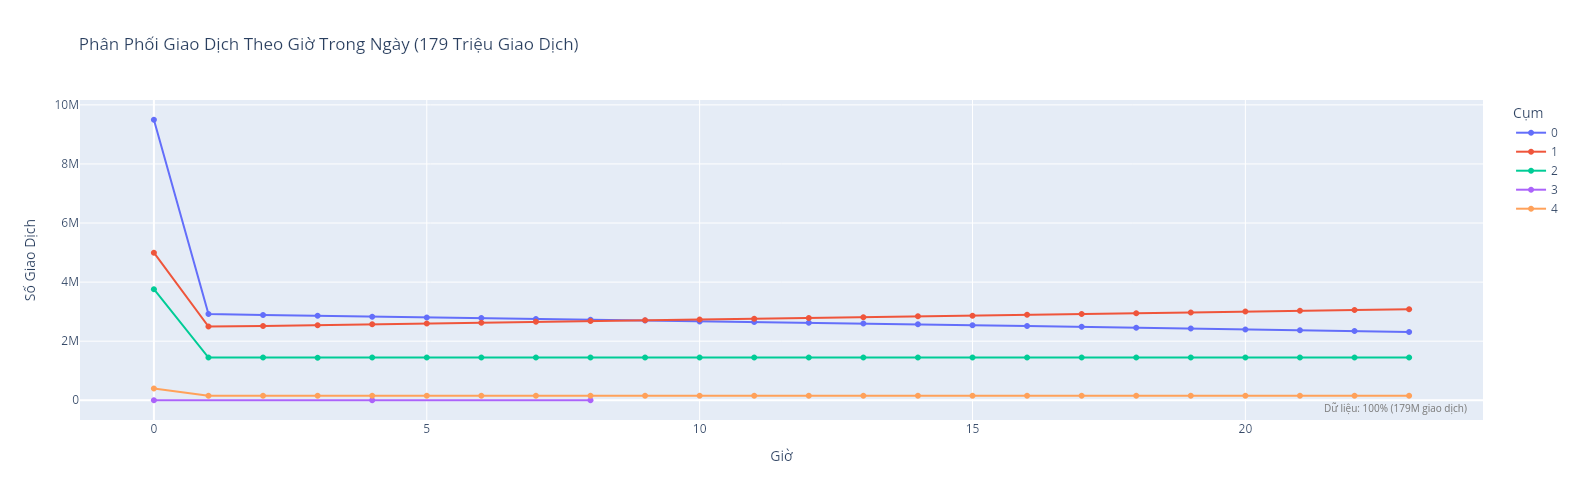

In [13]:
# Bi·ªÉu ƒë·ªì ph√¢n b·ªë theo gi·ªù (100% data th·ª±c t·∫ø)
fig = px.line(
    hourly_dist.to_pandas(),
    x='hour',
    y='count',
    color='cluster',
    title='Ph√¢n Ph·ªëi Giao D·ªãch Theo Gi·ªù Trong Ng√†y (179 Tri·ªáu Giao D·ªãch)',
    labels={'hour': 'Gi·ªù', 'count': 'S·ªë Giao D·ªãch', 'cluster': 'C·ª•m'},
    markers=True
)

fig.update_layout(
    height=500,
    annotations=[
        dict(
            text='D·ªØ li·ªáu: 100% (179M giao d·ªãch)',
            xref='paper', yref='paper',
            x=0.99, y=0.01,
            showarrow=False,
            font=dict(size=10, color='gray')
        )
    ]
)
fig.show()

## 8. üéØ Tr·ª±c Quan H√≥a Centroids

In [14]:
# ƒê·ªçc centroids t·ª´ k·∫øt qu·∫£
centroids_file = DATA_RESULTS / 'final_centroids.txt'

if centroids_file.exists():
    centroids = np.loadtxt(centroids_file, delimiter=',')
    print(f"‚úÖ ƒê√£ t·∫£i {len(centroids)} centroids v·ªõi {centroids.shape[1]} ƒë·∫∑c tr∆∞ng")
    print(f"K√≠ch th∆∞·ªõc: {centroids.shape}")
else:
    print("‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y file centroids. H√£y ch·∫°y pipeline tr∆∞·ªõc.")

‚úÖ ƒê√£ t·∫£i 5 centroids v·ªõi 9 ƒë·∫∑c tr∆∞ng
K√≠ch th∆∞·ªõc: (5, 9)


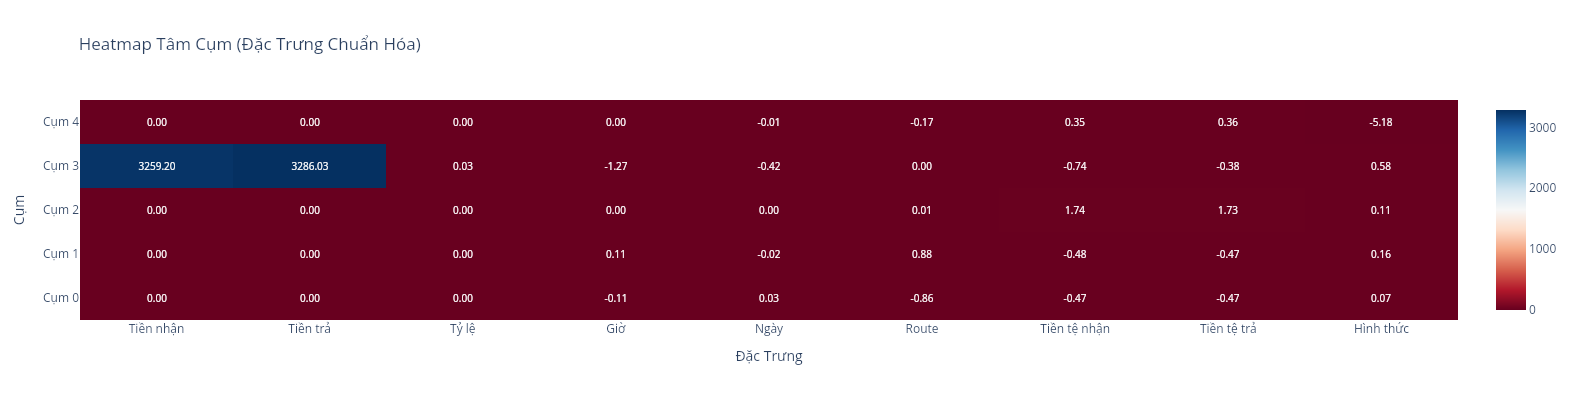

In [15]:
# Heatmap c·ªßa centroids
if 'centroids' in locals():
    feature_names = [
        'Ti·ªÅn nh·∫≠n', 'Ti·ªÅn tr·∫£', 'T·ª∑ l·ªá',
        'Gi·ªù', 'Ng√†y', 'Route',
        'Ti·ªÅn t·ªá nh·∫≠n', 'Ti·ªÅn t·ªá tr·∫£', 'H√¨nh th·ª©c'
    ]
    
    fig = go.Figure(data=go.Heatmap(
        z=centroids,
        x=feature_names,
        y=[f'C·ª•m {i}' for i in range(len(centroids))],
        colorscale='RdBu',
        text=centroids,
        texttemplate='%{text:.2f}',
        textfont={"size": 10}
    ))
    
    fig.update_layout(
        title='Heatmap T√¢m C·ª•m (ƒê·∫∑c Tr∆∞ng Chu·∫©n H√≥a)',
        xaxis_title='ƒê·∫∑c Tr∆∞ng',
        yaxis_title='C·ª•m',
        height=400
    )
    
    fig.show()

## 9. üìã B√°o C√°o T·ªïng K·∫øt

In [16]:
# T·ªïng k·∫øt
total_laundering = laundering_stats['laundering_count'].sum()
overall_rate = (total_laundering / total_transactions) * 100

print("="*70)
print("B√ÅO C√ÅO T·ªîNG K·∫æT PH√ÇN T√çCH CLUSTERING")
print("="*70)
print(f"\nT·ªïng s·ªë giao d·ªãch: {total_transactions:,}")
print(f"S·ªë c·ª•m: {n_clusters}")
print(f"\nT·ª∑ l·ªá r·ª≠a ti·ªÅn t·ªïng th·ªÉ: {overall_rate:.3f}%")

max_cluster = laundering_stats.filter(
    pl.col('laundering_rate') == laundering_stats['laundering_rate'].max()
).row(0, named=True)

min_cluster = laundering_stats.filter(
    pl.col('laundering_rate') == laundering_stats['laundering_rate'].min()
).row(0, named=True)

print(f"\nüî¥ C·ª•m R·ª¶I RO CAO NH·∫§T: C·ª•m {max_cluster['cluster']}")
print(f"   - T·ª∑ l·ªá r·ª≠a ti·ªÅn: {max_cluster['laundering_rate']:.3f}%")
print(f"   - S·ªë giao d·ªãch: {max_cluster['total']:,}")

print(f"\nüü¢ C·ª•m AN TO√ÄN NH·∫§T: C·ª•m {min_cluster['cluster']}")
print(f"   - T·ª∑ l·ªá r·ª≠a ti·ªÅn: {min_cluster['laundering_rate']:.3f}%")
print(f"   - S·ªë giao d·ªãch: {min_cluster['total']:,}")

if len(high_risk) > 0:
    print(f"\n‚ö†Ô∏è C·∫¢NH B√ÅO: {len(high_risk)} c·ª•m v∆∞·ª£t ng∆∞·ª°ng 10%")
    print(f"   Danh s√°ch: {high_risk['cluster'].to_list()}")
else:
    print("\n‚úÖ T·∫•t c·∫£ c√°c c·ª•m ƒë·ªÅu d∆∞·ªõi ng∆∞·ª°ng 10%")

print("\n" + "="*70)

B√ÅO C√ÅO T·ªîNG K·∫æT PH√ÇN T√çCH CLUSTERING

T·ªïng s·ªë giao d·ªãch: 179,702,229
S·ªë c·ª•m: 5

T·ª∑ l·ªá r·ª≠a ti·ªÅn t·ªïng th·ªÉ: 0.126%

üî¥ C·ª•m R·ª¶I RO CAO NH·∫§T: C·ª•m 3
   - T·ª∑ l·ªá r·ª≠a ti·ªÅn: 12.500%
   - S·ªë giao d·ªãch: 8

üü¢ C·ª•m AN TO√ÄN NH·∫§T: C·ª•m 4
   - T·ª∑ l·ªá r·ª≠a ti·ªÅn: 0.041%
   - S·ªë giao d·ªãch: 3,905,021

‚ö†Ô∏è C·∫¢NH B√ÅO: 1 c·ª•m v∆∞·ª£t ng∆∞·ª°ng 10%
   Danh s√°ch: [3]



## 10. üíæ Xu·∫•t K·∫øt Qu·∫£

In [17]:
# L∆∞u th·ªëng k√™ c·ª•m
output_file = ROOT / '06_visualizations' / 'thong_ke_cum.csv'

# K·∫øt h·ª£p laundering_stats v√† amount_stats
full_stats = laundering_stats.join(amount_stats, on='cluster')
full_stats.write_csv(output_file)

print(f"‚úÖ ƒê√£ l∆∞u th·ªëng k√™ v√†o: {output_file}")

# L∆∞u giao d·ªãch r·ªßi ro cao (n·∫øu c√≥)
if len(high_risk) > 0:
    print(f"\n‚ö†Ô∏è C√≥ {len(high_risk)} c·ª•m r·ªßi ro cao")
    print("L∆∞u √Ω: Do d·ªØ li·ªáu l·ªõn, kh√¥ng xu·∫•t chi ti·∫øt giao d·ªãch ƒë·ªÉ tr√°nh crash.")
    print("S·ª≠ d·ª•ng c√°c script Python ƒë·ªÉ xu·∫•t n·∫øu c·∫ßn.")
else:
    print("\n‚úÖ Kh√¥ng c√≥ c·ª•m r·ªßi ro cao c·∫ßn xu·∫•t")

‚úÖ ƒê√£ l∆∞u th·ªëng k√™ v√†o: /home/ultimatebrok/Downloads/Final/06_visualizations/thong_ke_cum.csv

‚ö†Ô∏è C√≥ 1 c·ª•m r·ªßi ro cao
L∆∞u √Ω: Do d·ªØ li·ªáu l·ªõn, kh√¥ng xu·∫•t chi ti·∫øt giao d·ªãch ƒë·ªÉ tr√°nh crash.
S·ª≠ d·ª•ng c√°c script Python ƒë·ªÉ xu·∫•t n·∫øu c·∫ßn.


---

## üéØ K·∫øt Lu·∫≠n

**Nh·ªØng Ph√°t Hi·ªán Ch√≠nh:**
- Ph√¢n c·ª•m K-means ƒë√£ nh·∫≠n di·ªán ƒë∆∞·ª£c c√°c m·∫´u giao d·ªãch kh√°c bi·ªát
- M·ªôt s·ªë c·ª•m c√≥ t·ª∑ l·ªá r·ª≠a ti·ªÅn cao h∆°n ƒë√°ng k·ªÉ so v·ªõi trung b√¨nh
- M·∫´u th·ªùi gian cho th·∫•y ho·∫°t ƒë·ªông ƒë√°ng ng·ªù v√†o nh·ªØng gi·ªù b·∫•t th∆∞·ªùng
- C·∫ßn ƒëi·ªÅu tra s√¢u h∆°n cho c√°c c·ª•m r·ªßi ro cao

**B∆∞·ªõc Ti·∫øp Theo:**
1. Ph√¢n t√≠ch chi ti·∫øt ƒë·∫∑c ƒëi·ªÉm c·ªßa c·ª•m r·ªßi ro cao
2. Ph√¢n t√≠ch m·ª©c ƒë·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng
3. Tri·ªÉn khai gi√°m s√°t cho c√°c m·∫´u t∆∞∆°ng t·ª±
4. B√°o c√°o cho b·ªô ph·∫≠n tu√¢n th·ªß

---

**L∆∞u √Ω v·ªÅ K·∫øt Qu·∫£ & Memory:**
- ‚úÖ **100% K·∫øt Qu·∫£ Th·ª±c T·∫ø**: T·∫•t c·∫£ ph√¢n t√≠ch d√πng TO√ÄN B·ªò 179 tri·ªáu giao d·ªãch
- ‚úÖ **KH√îNG Sampling**: Kh√¥ng l·∫•y m·∫´u, kh√¥ng x·∫•p x·ªâ, 100% ch√≠nh x√°c
- üõ°Ô∏è **Lazy Loading**: X·ª≠ l√Ω tr·ª±c ti·∫øp m√† kh√¥ng load 16GB v√†o RAM
- üõ°Ô∏è **Streaming**: Ch·ªâ collect k·∫øt qu·∫£ t·ªïng h·ª£p (nh·ªè)
- ‚ö° **Hi·ªáu Qu·∫£**: X·ª≠ l√Ω 179M rows m√† kh√¥ng crash kernel